# **Unit 1 Final Project** *NEUR 3002 / BMED 4803*

### **Group 4**: Mani, Mackenzie, Campbell, Vibha, Pooja

## <u>Question 2:</u> Python Models for LIFs and Simple NN

#### **Leaky Integrate and Fire Model**

/var/folders/60/ckh91vqs5vj5wl8d0my_b8080000gn/T/ipykernel_50791/1425678534.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.arange(-75, -39, 5))


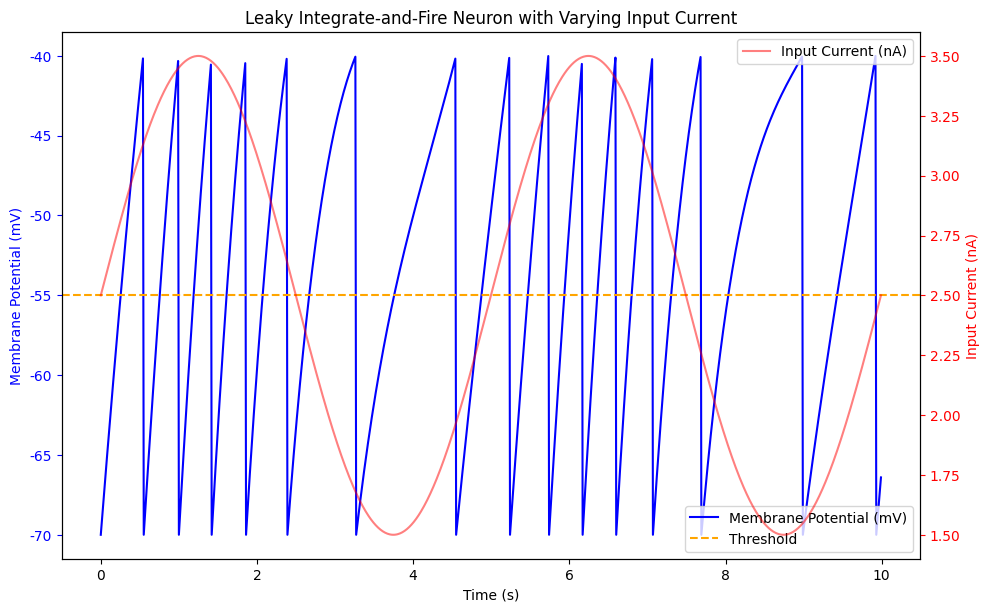

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_leaky_integrate_and_fire(I):
    # Constants
    R = 1.0       # Membrane resistance (in ohms)
    C = 1.0       # Membrane capacitance (in farads)
    tau = R * C   # Time constant (in seconds)
    V_rest = 0.0  # Resting membrane potential (in volts)
    V_thresh = 1.2 # Threshold potential (in volts)
    V_reset = 0.0  # Reset potential (in volts)

    # Simulation parameters
    dt = 0.01      # Time step (in seconds)
    timesteps = 1000
    time = np.arange(0, timesteps * dt, dt)

    # Leaky integrate-and-fire neuron simulation
    V = np.zeros_like(time)
    spikes = []

    for i in range(1, len(time)):
        dV = (V_rest - V[i - 1] + R * I[i-1]) / tau * dt  # Leaky integration with input current
        V[i] = V[i - 1] + dV
        
        if V[i] >= V_thresh:  # Spike condition
            V[i] = V_reset
            spikes.append(i * dt)

    return time, V, spikes, V_thresh

# Varying input current over time
input_current = np.sin(np.linspace(0, 4*np.pi, 1000)) + 2.5

# Simulate leaky integrate-and-fire neuron with varying input
time, membrane_potential, spike_times, V_thresh = simulate_leaky_integrate_and_fire(input_current)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Membrane potential plot on the left y-axis
ax1.plot(time, membrane_potential, label='Membrane Potential (mV)', color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Membrane Potential (mV)', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_yticklabels(np.arange(-75, -39, 5))
ax1.axhline(y=0.6, color='orange', linestyle='--', label='Threshold')
ax1.legend()


# Create a second y-axis on the right for the input current
ax2 = ax1.twinx()
ax2.plot(time, input_current, label='Input Current (nA)', color='red', alpha=0.5)
ax2.set_ylabel('Input Current (nA)', color='red')
ax2.tick_params('y', colors='red')
ax2.legend()

# Mark spikes on the left y-axis
fig.tight_layout()
plt.title('Leaky Integrate-and-Fire Neuron with Varying Input Current')
plt.legend()
plt.show()


### **Leaky Integration and Fire with Sodium Voltage-Gated Channels**

/var/folders/60/ckh91vqs5vj5wl8d0my_b8080000gn/T/ipykernel_50791/4289173214.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.arange(-75, -39, 5))


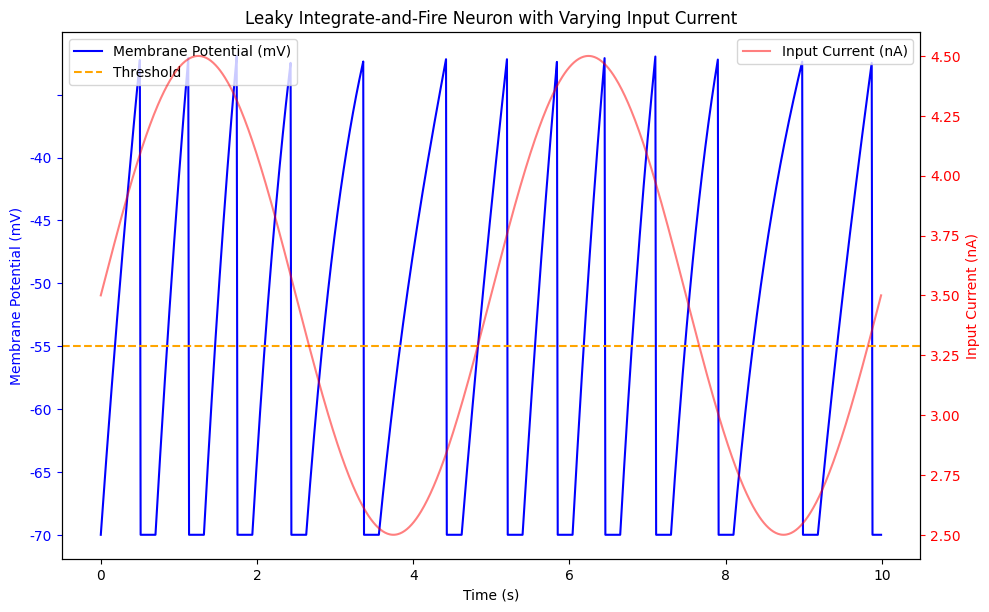

In [31]:

import numpy as np
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self):
        self.membrane_potential = 0.0
        self.sodium_channels = VoltageGatedSodiumChannels()
        self.refractory_period = 0.0

    def integrate_and_fire(self, input_current):
        # Constants
        R = 1.0       # Membrane resistance (in ohms)
        C = 1.0       # Membrane capacitance (in farads)
        tau = R * C   # Time constant (in seconds)
        V_rest = 0.0  # Resting membrane potential (in volts)
        V_thresh = 1.5 # Threshold potential (in volts)
        V_reset = 0.0  # Reset potential (in volts)
        refractory_time = 0.2  # Refractory period time (in seconds)

        # Simulation parameters
        dt = 0.01      # Time step (in seconds)
        timesteps = len(input_current)
        time = np.arange(0, timesteps * dt, dt)

        # Leaky integrate-and-fire neuron simulation
        V = np.zeros_like(time)
        spikes = []

        for i in range(1, len(time)):
            if self.refractory_period > 0:
                self.refractory_period -= dt
                V[i] = V_reset
            else:
                dV = (V_rest - V[i - 1] + R * input_current[i-1]) / tau * dt  # Leaky integration with input current
                V[i] = V[i - 1] + dV

                # Check for voltage-gated sodium channel opening
                if V[i] >= V_thresh:
                    self.sodium_channels.open()
                    self.generate_action_potential()
                    self.sodium_channels.close()

                    # Set refractory period
                    self.refractory_period = refractory_time

        return time, V, spikes

    def generate_action_potential(self):
        return
class VoltageGatedSodiumChannels:
    def __init__(self):
        self.open_state = False

    def open(self):
        self.open_state = True

    def close(self):
        self.open_state = False

# Varying input current over time
input_current = np.sin(np.linspace(0, 4*np.pi, 1000)) + 2.5 + 1

# Create neuron instance
neuron = Neuron()

# Simulate leaky integrate-and-fire neuron with varying input
time, membrane_potential, _ = neuron.integrate_and_fire(input_current)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Membrane potential plot on the left y-axis
ax1.plot(time, membrane_potential, label='Membrane Potential (mV)', color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Membrane Potential (mV)', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_yticklabels(np.arange(-75, -39, 5))
ax1.axhline(y=0.6, color='orange', linestyle='--', label='Threshold')
ax1.legend()


# Create a second y-axis on the right for the input current
ax2 = ax1.twinx()
ax2.plot(time, input_current, label='Input Current (nA)', color='red', alpha=0.5)
ax2.set_ylabel('Input Current (nA)', color='red')
ax2.tick_params('y', colors='red')


# Mark spikes on the left y-axis
fig.tight_layout()
plt.title('Leaky Integrate-and-Fire Neuron with Varying Input Current')
plt.legend()
plt.show()



### **Simple Neural Network**

Neural Network Output: 0.4
Threshold Reached! Neuron fired and feedforward activated!


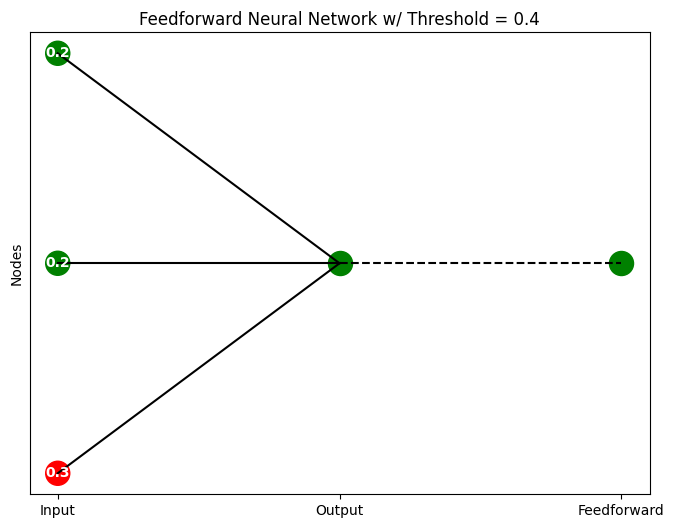

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def simple_neural_network(input_data, weights_input):
    # Calculate the weighted sum for the hidden layer
    output = np.dot(input_data, weights_input)        
    return output

# Input data (3 binary input nodes)
input_data = np.array([1, 1, 0])

# Weights for the output layer (1 weight for each node in the hidden layer)
weights= np.array([0.2, 0.2, 0.3])

# Calculate the final output of the neural network
final_output = simple_neural_network(input_data, weights)

# Define a threshold for activation
## If the final output of the output node is >= threshold value: then the node fires 
threshold = 0.4

# Display the result
print("Neural Network Output:", final_output)

# Plotting the neural network architecture
plt.figure(figsize=(8, 6))

# Input nodes
color_array = []
for i in input_data:
    if i == 1:
        color_array.append('green')
    else:
        color_array.append('red')

plt.scatter([0, 0, 0], [1, 0, -1], marker='o', label='Input Nodes', color=color_array, s=300)
for i, label in enumerate(weights):
    plt.text(0, [1,0,-1][i], label, ha='center', va='center', color='white', weight='bold')

# Output node
node_color = "red"
if final_output >= threshold:
    node_color = "green"
    print("Threshold Reached! Neuron fired and feedforward activated!")
else:
    print("Summation is sub-treshold (less than 0.4), output nodes not activated")    

plt.plot([0, 1], [1, 0], color='black')
plt.plot([0, 1], [0, 0], color='black')
plt.plot([0, 1], [-1, 0], color='black')
plt.scatter(1, 0, marker='o', label='Hidden Node', color=node_color, s=300)

# Feedforward node
plt.scatter(2, 0, marker='o', label='Output Node', color=node_color, s=300)
plt.plot([1, 2], [0, 0], color='black', linestyle='--')

plt.xticks([0, 1, 2], ['Input', 'Output', 'Feedforward'])
plt.yticks([])
plt.xlabel('')
plt.ylabel('Nodes')
plt.title('Feedforward Neural Network w/ Threshold = 0.4')
plt.show()


## <u>Question 3:</u> Descriptions for Models in Question 2

#### **Leaky Integrate and Fire Model**:
This code functions by defining LIF parameters for 1) resistance, 2) capacitance, 3) time constant, and different voltages representing 1) resting membrane potential, 2) threshold potential, and 3) reset potential.

For each spike, the equation relating capacitance to change in membrane potential was used to discover current in respect to time.

Using this knowledge, the spikes were calculated by integrating dV/dt to find overall membrane potential. If the overall membrane potential was greater than or equal to “threshold” - around -55 mV - then a spike would occur and the system would repolarize to reset potential. The current was calculated as a sine wave and both voltage and current were plotted with matplotlib.

This model does not include voltage-gated sodium channels that will account for a biologically accurate refractory period. There is no period of “rest time” (after an action potential) at the resting membrane potential before the membrane begins to depolarize again.

Because there are no voltage-gated sodium channels present on this model, the code is less complex. There is less uncertainty as to whether current will flow into a neuron (the ion channels are ALWAYS open, so current will always flow in and thus always increase voltage), so it can be assumed that less bits are contained in the model.


#### **Leaky Integrate and Fire with Sodium Voltage-Gated Channels Model**:
The foundation of this code is similar to the original LIF model, but it contains parameters for refractory periods that create breaks between each spike output. To create refractory periods, there is a for loop that forces the system to pause at resting potential if it is within the refractory period after firing. Following the refractory period, the model uses modeled sodium channels opening and closing to represent the voltage-gated sodium channels in a neuron and create a spike. 

Adding voltage-gated sodium channels to an LIF neuron model increases its complexity and biological accuracy (spike generation is dependent on the generation of action potentials by voltage-gated sodium channels). These channels also can lead to more complex firing patterns like bursting, adaptive, etc., which may need more Information to solidify. Therefore, with increasing complexity, the bits within this model are likely increasing.



#### **Simple Neural Network**:
This neural network operates according to simple perceptron principles. Three binary input nodes are defined, each with respective weights. A threshold value is set to be 0.4 for this particular model with input weights of [0.2, 0.2, 0.3]. If any combination of inputs multiplied by their weights sums up to the threshold/beyond threshold, then the output node fires and in response the feedforward node responds downstream as well. The benefits of this model is that it allows us to simply model neurons as a network to see how they would function in a system, rather than just individually. The biggest limitation of this model is the simplicity. There are no parameters to describe spatiotemporal variables and there is only 1 output neuron with 3 input neurons. 

The labels on the input nodes represent the weights associated with each input. Green means the input is active and red means the input is inactive.

Using only 1 layer between the inputs and final output (feedforward neuron) reduces the number of bits to reduce uncertainty to 0% according to information theory. Adding more layers would increase the number of bits. Due to the higher number of variables, the bits in this model are greater than the LIF model. 


## <u>Question 4:</u> Simple Neural Network with different inputs

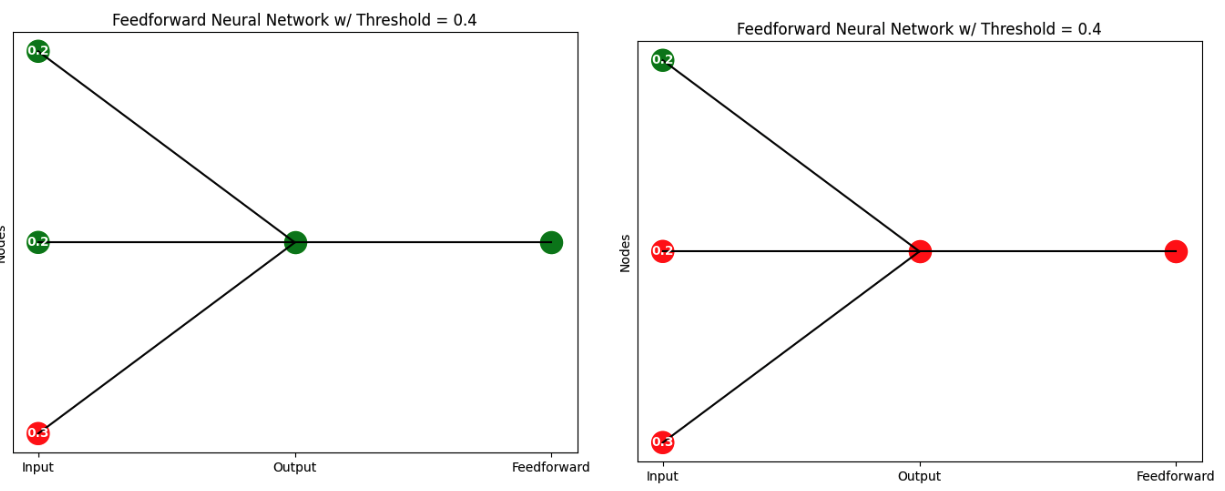

The image on the left shows a simple neural network feedforward model with a threshold of 0.4. There are three inputs (1 for the green inputs, 0 for the red inputs) with respective weights of [0.2, 0.2, 0.3]. The first image shows the summation of two active input nodes which result in a 0.4 integration, allowing the output and feedforward nodes to be turned on. 

The second image shows only 1 active input node (as opposed to two active nodes in the previous example), which results in an integrated sum of 0.2. As this weighted input is less than 0.4, the resulting output and subsequent feedforward pathway remain inactive. 

This indicates that the number of active nodes contributes to the overall sum of the neural network, with a larger number of inputs improving the chances of reaching threshold and producing an output. In the nervous system, this can be reflected in the number of pre-synaptic inputs activating a certain postsynaptic neuron or neural pathway. A greater number of inputs will allow for improved chances of firing an action potential, even with these inputs having smaller weights.


## <u>Question 5:</u> Simple Neural Network with constituently active output and inhibition 

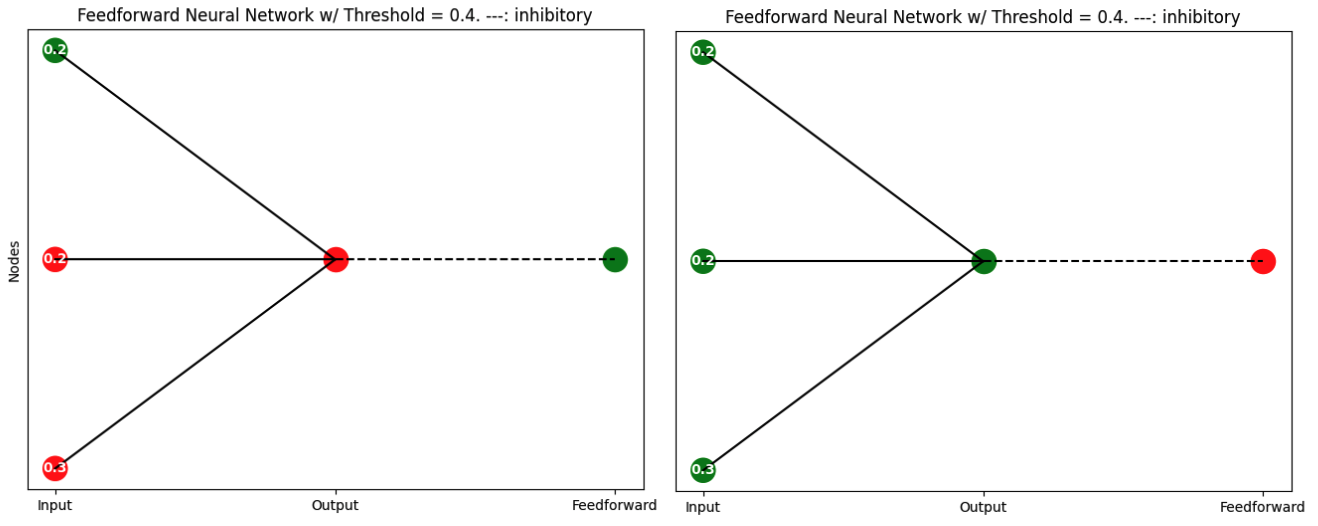

These updated plots show that the feedforward model is no longer excitatory, but inhibitory. When the inputs are not enough to reach the threshold of 0.4 (such as in the left figure), the output node is not activated. This allows the intrinsic firing of the feedforward neuron to continue uninhibited by the output node. In the image to the right, all the input neurons fire at a magnitude large enough to reach the threshold, producing an output signal. This in turn inhibits the feedforward neuron and turns it off.

This indicates that the inhibitory inputs can be the difference between activation or inhibition of a pathway. In the nervous system, this can be reflected in different control pathways, where inhibitory feedforward or feedback pathways can be defined by these inhibitory inputs.


## <u>Question 6:</u> Block Diagrams Write-Up

**Block Diagrams** are one way of representing macro-circuits in neural systems. These diagrams show how different subsystems can work with each other and perform computations, also known as transfer functions, that translate incoming signals to outgoing signals. Block diagrams depict how signals converge, diverge, and are transformed throughout a pathway. Using block diagrams, different neural pathway control strategies to adapt and correct behavior can be visualized and traced.

Block diagrams have a few [key components](https://www.electronicsforu.com/technology-trends/learn-electronics/control-system-definition-types-applications-and-faqs) that depict how signals move and change when traveling through a neural pathway. Primarily, a controller is the algorithm or device that provides information for operating the actuator, the device that produces the output action, in response to an input. Sensors are devices that can monitor the controlled variable, which can feed into a neural comparator that detects and computes an error signal for the pathway to correct errors in the output.

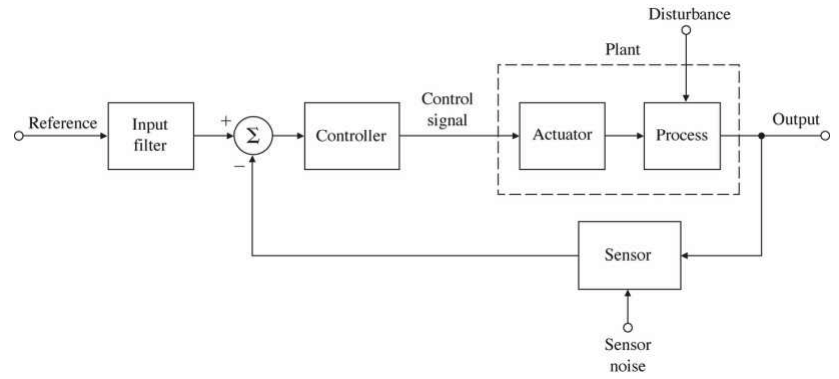
Fig. 1: Visualization of a block diagram with an input signal, controller, actuator, sensor, neural comparator (as denoted by the Σ), and an output signal.

*From https://faculty.mercer.edu/jenkins_he/documents/Lecture1MAE691ModernControlTheory.pdf*

These components can be integrated into various different types of block diagrams to depict different control strategies used by the nervous system to produce responses and respond to changes in the environment. Primarily, feedforward, or open-loop, control strategies pass in an input into the controller, which activates the actuator to produce an output. This, albeit simple pathway, can be used to respond quickly and accurately to an input if the controller is programmed accurately. However, if the pathway is placed into new environments and faced with unexpected inputs, there is no way for the system to correct itself. 

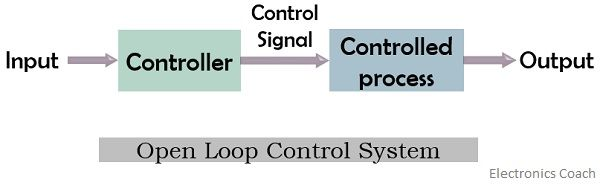
Fig. 2: Example of a feedforward pathway, where the controller uses an input signal to activate the actuator (controlled process) to produce an output

*From https://electronicscoach.com/open-loop-control-system.html*

One pathway that allows for output correction is the feedback, or closed-loop, pathway. This pathway begins similarly to the open-loop pathways, with an input passed into a controller and actuator, producing an output signal. However, once this output signal is produced, a sensor detects the output signal and feeds it into a neural comparator that is located before the controller. This comparator uses both the input signal as well as the feedback output signal from the sensor to compute an error signal that is fed into the controller to correct errors in the output signal. This allows the pathway to correct errors in a pathway and adapt to new situations, though there are delays in this correction as the output signal must be considered ‘incorrect’ before the sensor and neural comparator are able to correct any error. 

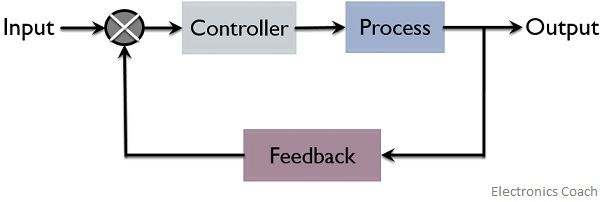

Fig. 3: Example of a feedback pathway, where the controller uses an input signal as well as an error signal computed from feedback from a sensor to activate the actuator (controlled process) to produce an output. 

*From https://electronicscoach.com/closed-loop-control-system.html*

In order to be able to predict errors in a control pathway to improve speed of correction, a predictive feedforward pathway can be used. This pathway functions like a feedback pathway with an additional predictive input fed into the neural comparator. This predictive input is calibrated using prior experience as well as actively calibrated using the feedback from the sensors, allowing for anticipation of errors in an output signal and correcting them prior to the signal being produced. 

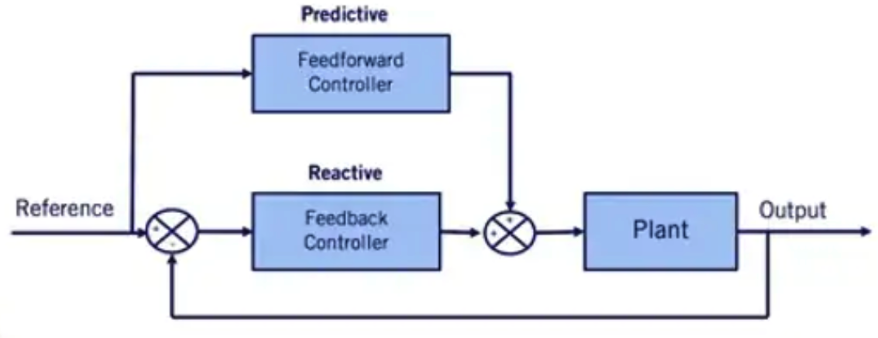

Fig. 4: Example of a predictive feedforward pathway, where the controller uses an input signal as well as an error signal computed from feedback from a sensor and predictive measurements to activate the actuator (plant) to produce an output.

*From https://vimeo.com/539038785*

Block diagrams can be used to model all three of these pathways and depict their components, transformations of the signal, and various inputs and outputs that can influence the pathway. By using these diagrams, neural pathways can be simplified and visualized in order to better understand how signals are processed and adapted in different situations.


## <u>Question 7:</u> Bonus!

Current mood:
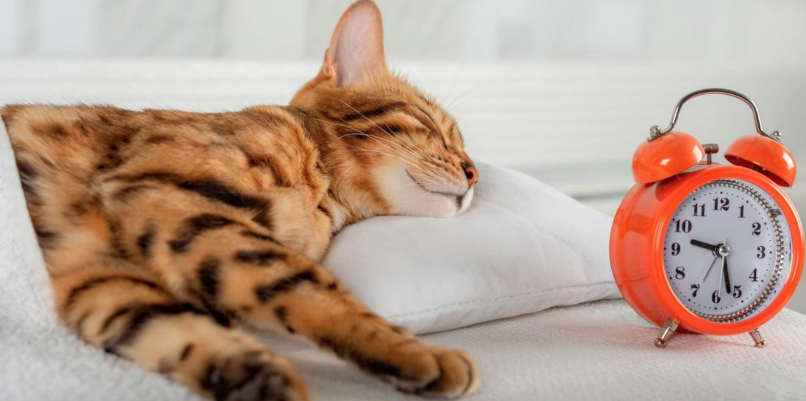

In [35]:
cat_art= """
     /\\_/\\
    ( o.o )
    (> ^ <)
    /  ~  \\                           /\\_/\\
   (   _   )                         ( o.o )
    \\  |  /                           (> ^ <)
     \\_|_/  \\/\\                    /  \\_/  \\
          / o.o                   (  )   _   )
          (> ^ <)                   \\_|  |  /
          /  ~  \\       /\\           / _ \\
         (   _   )     ( o.o )       / / \\ \\
          \\_|_/       (> ^ <)       /_/   \\_\\
                     /  ~  \\      /\\_/\\
                    (   _   )    ( o.o )
                     \\_|_/        (> ^ <)
                                  /  ~  \\
                                 (   _   )
                                  \\_|_/
"""

print(cat_art)



     /\_/\
    ( o.o )
    (> ^ <)
    /  ~  \                           /\_/\
   (   _   )                         ( o.o )
    \  |  /                           (> ^ <)
     \_|_/  \/\                    /  \_/  \
          / o.o                   (  )   _   )
          (> ^ <)                   \_|  |  /
          /  ~  \       /\           / _ \
         (   _   )     ( o.o )       / / \ \
          \_|_/       (> ^ <)       /_/   \_\
                     /  ~  \      /\_/\
                    (   _   )    ( o.o )
                     \_|_/        (> ^ <)
                                  /  ~  \
                                 (   _   )
                                  \_|_/

